# Heart Disease Analysis
### Description:
<span style="color: green;">In this assignment we will thoroughly go through the data and analysis it to get usefull insights that are beneficial for our greater understanding of the data which can be used for further insights and prediction<span >



In [39]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
df=pd.read_csv("heart.csv")


In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
df.columns.values

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype=object)

In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


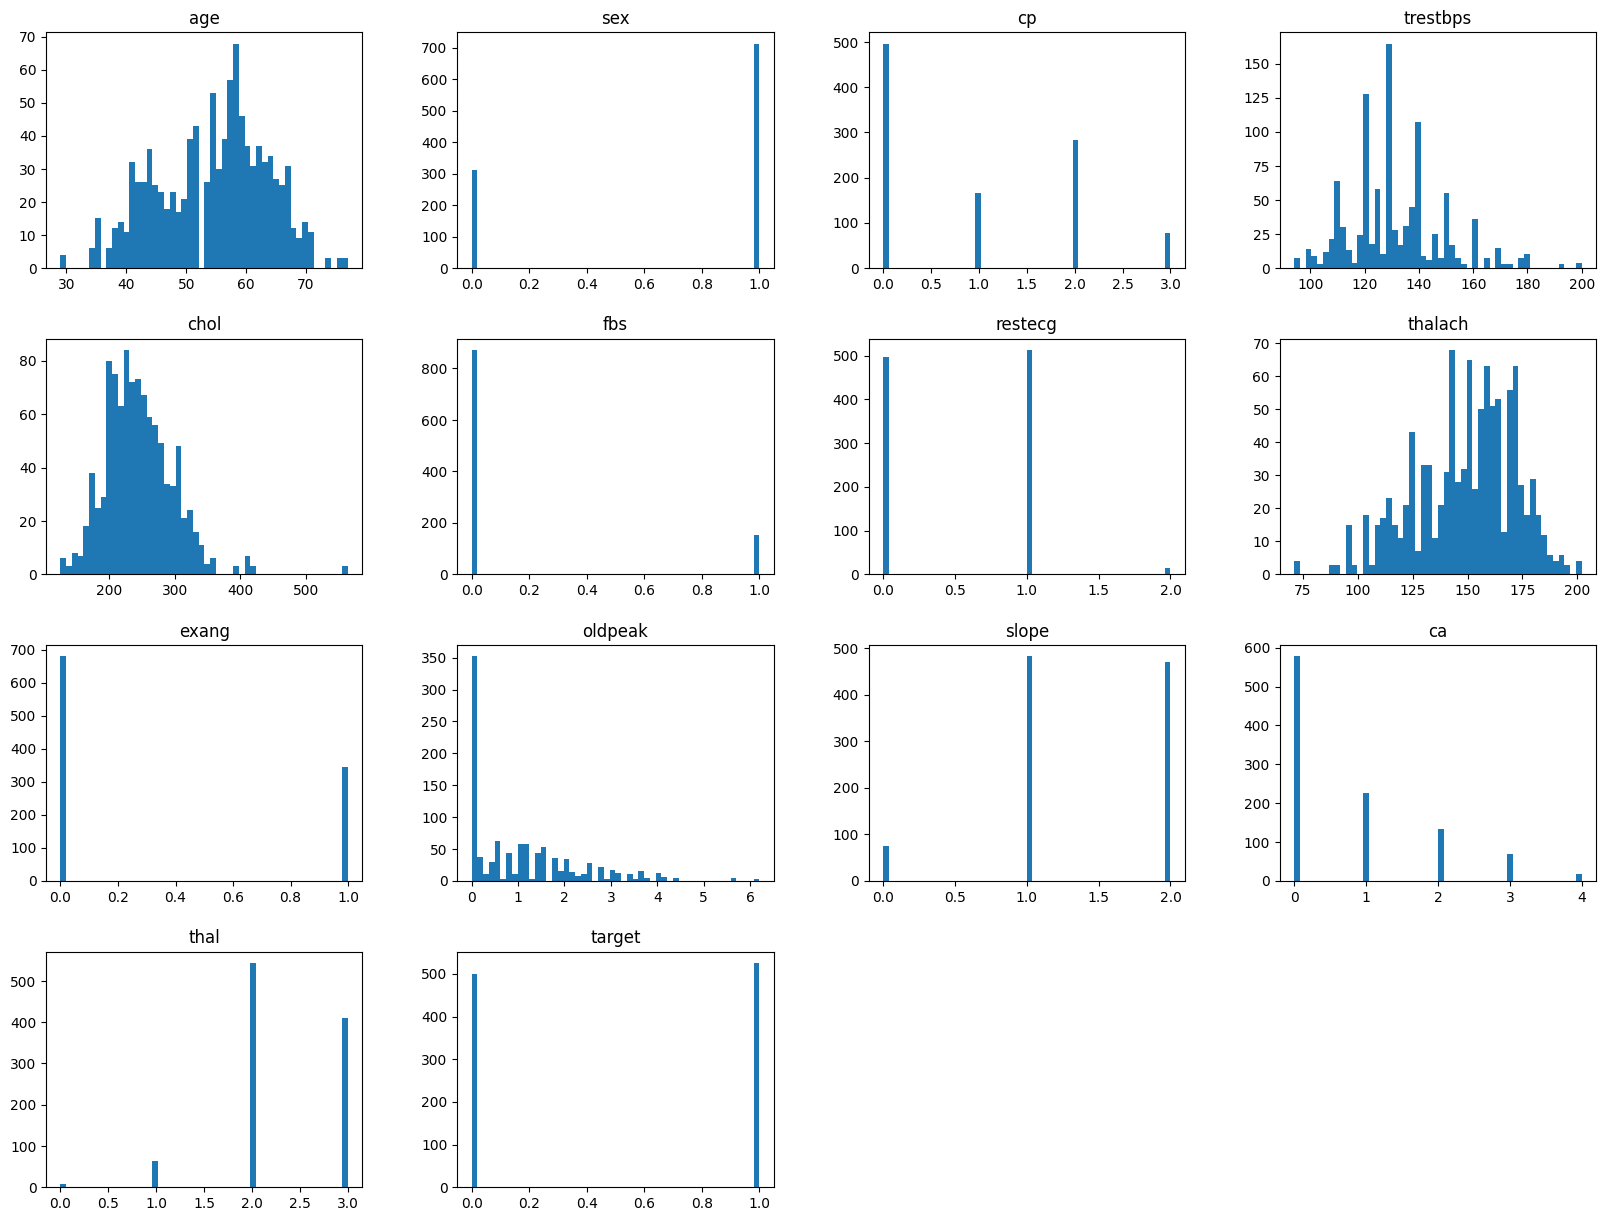

In [9]:
#ploting histogram for all the numeric values in data 

df.hist(bins=50,grid=False, figsize=(20,15));

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
questions=["1. How many have heart disease and how many people doesn't have heart disease?",
           "2. People of which  sex has  most heart disease?",
           " 3.People of which sex has which type of chest pain mostly?",
           "4.People with chest pain are mmost prone  to have heart desease"]
questions

["1. How many have heart disease and how many people doesn't have heart disease?",
 '2. People of which  sex has  most heart disease?',
 ' 3.People of which sex has which type of chest pain mostly?',
 '4.People with chest pain are mmost prone  to have heart desease']

#### Finding answer for the first question

#### <span style="color:Orange">1. How many have heart disease and how many people doesn't have heart disease?"<spam>


In [12]:

#geting the required value
df.target.value_counts()

target
1    526
0    499
Name: count, dtype: int64

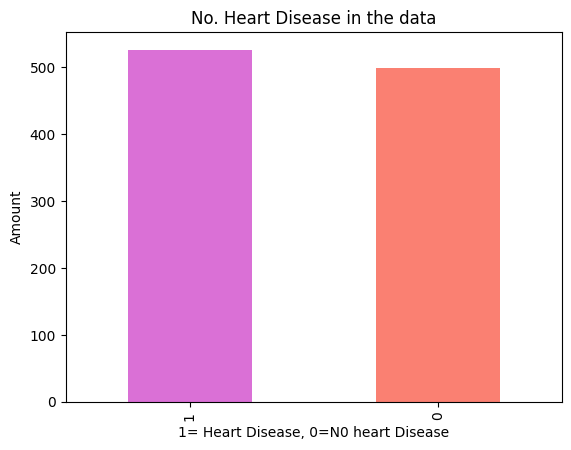

In [14]:
#bar graph for above values
df.target.value_counts().plot(kind='bar',color=['orchid',"salmon"])
plt.title("No. Heart Disease in the data")
plt.xlabel("1= Heart Disease, 0=N0 heart Disease")
plt.ylabel("Amount");

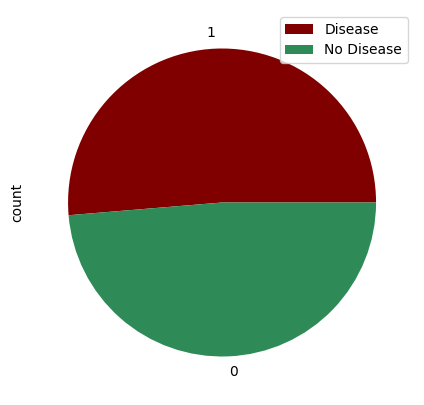

In [18]:

#ploting the pie chart for the same values

df.target.value_counts().plot(kind='pie', colors=['maroon', 'seagreen'], figsize=(6,5))

plt.legend(['Disease','No Disease']);


  <span style="color=yellow">0 represents Females <span>
 1 represents Males
 In sex column 

 0 represent No Disease
 1 represent Disease
 In target column 


In [19]:

#now lets see no pof males and females in the dataset


df.sex.value_counts()

sex
1    713
0    312
Name: count, dtype: int64

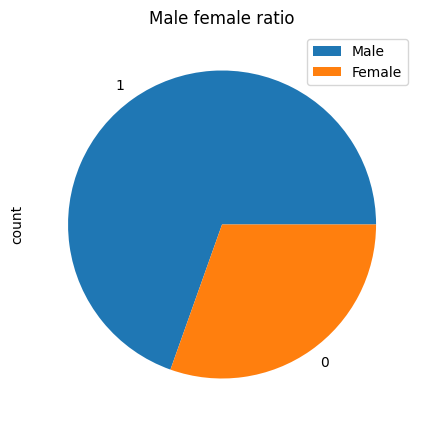

In [21]:
#ploting the pie chart
df.sex.value_counts().plot(kind='pie',figsize=(6,5))
plt.title('Male female ratio')
plt.legend(["Male","Female"]);

#### lets find the answer for the 2nd qestion

#### <span style="color:Orange">2. People of which  sex has  most heart disease<span>

In [22]:
pd.crosstab(df.sex,df.target)

target,0,1
sex,,
0,86,226
1,413,300


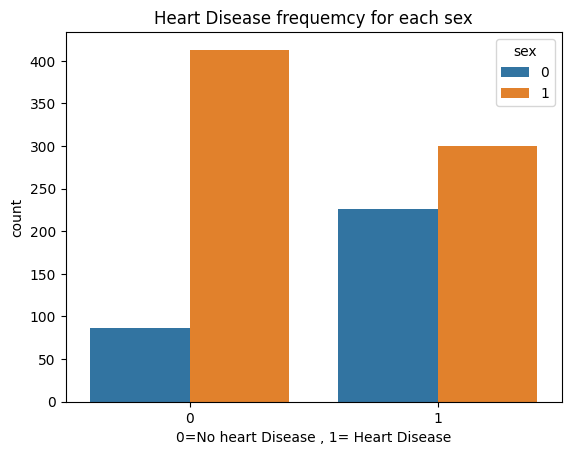

In [23]:
sns.countplot(x='target',data=df,hue='sex')
plt.title("Heart Disease frequemcy for each sex")
plt.xlabel("0=No heart Disease , 1= Heart Disease");

Numbers of males is more than double in the   dataset than female


More than '45% male ' has heart disease and 75% of female have it

#### let's Move to question 3
#### <span style="color:Orange">3.People of which sex has which type of chest pain mostly? <span>

In [24]:
df.cp.value_counts()

cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64

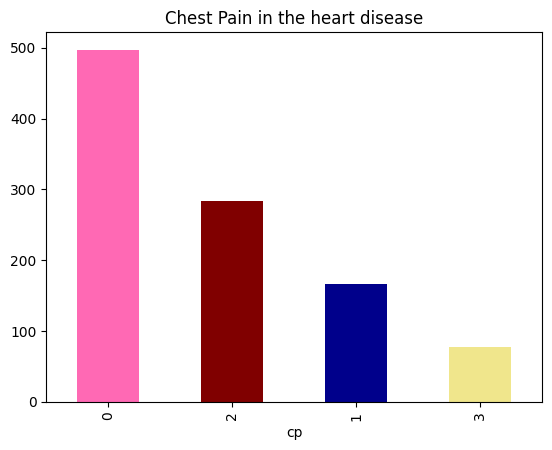

In [33]:
df.cp.value_counts().plot(kind='bar',color=['#FF69B4', '#800000', '#00008B', 'khaki'])
plt.title("Chest Pain in the heart disease");

In [30]:
pd.crosstab(df.sex,df.cp)

cp,0,1,2,3
sex,,,,
0,133,57,109,13
1,364,110,175,64


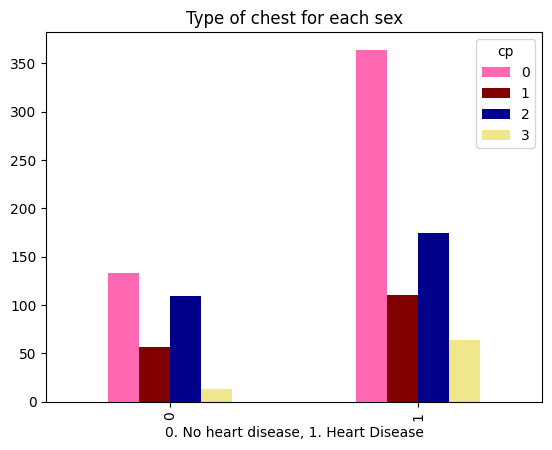

In [34]:
pd.crosstab(df.sex,df.cp).plot(kind='bar',color=['#FF69B4', '#800000', '#00008B', 'khaki'])
plt.title('Type of chest for each sex')
plt.xlabel("0. No heart disease, 1. Heart Disease");

 most male has 'type 0' chest pain and least of 'Male' has 'type 4 ' chest pain
 
 in case of female 'type 0 ' and 'type 2' percentage is almost same

#### now question 4!
#### <span style="color:Orange">4. People  with which chest pain are most prone to have heart disease?<span>


In [35]:
#now question 4!
#4. People  with which chest pain are most prone to have heart disease?

pd.crosstab(df.sex,df.cp)

cp,0,1,2,3
sex,,,,
0,133,57,109,13
1,364,110,175,64


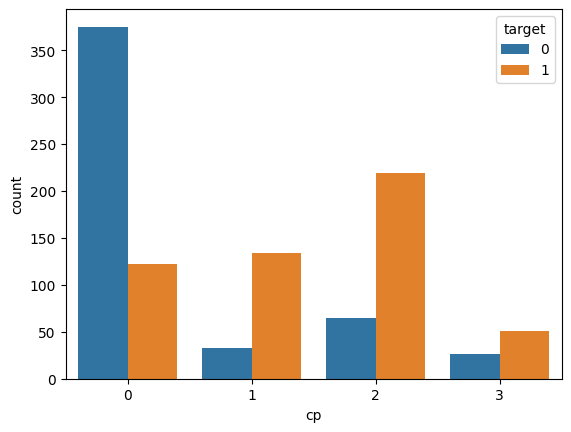

In [37]:
sns.countplot(x='cp',data=df,hue='target');


Most people with 'type 0' chest pain has less chances of getting heart disease

For others it is exact opposite


d:\ss\python3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


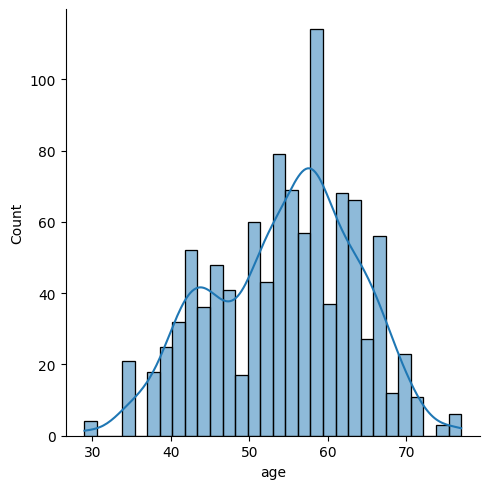

In [38]:
# Creating a distribution plot with normal distribution#
sns.displot(x='age',data=df,bins=30,kde=True);